In [70]:
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import folium

In [73]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus='False')

In [2]:
chromedriver_dir = r'C:/Users/BIT-R45/Downloads/chromedriver_win32/chromedriver.exe'
driver = webdriver.Chrome(chromedriver_dir)

In [3]:
driver.get('https://www.starbucks.co.kr/store/store_map.do')
time.sleep(3)

In [4]:
loca = driver.find_element_by_class_name('loca_search')
loca.click()
time.sleep(3)

In [6]:
sido = driver.find_element_by_class_name('sido_arae_box')
li = sido.find_elements_by_tag_name('li')
li[0].click()
time.sleep(3)

In [7]:
gugun = driver.find_element_by_class_name('gugun_arae_box')
guli = gugun.find_elements_by_tag_name('li')
guli[0].click()
time.sleep(3)

In [8]:
from bs4 import BeautifulSoup
source = driver.page_source

In [9]:
bs = BeautifulSoup(source,'lxml')
entire = bs.find('ul',class_='quickSearchResultBoxSidoGugun')
entire

<ul class="quickSearchResultBoxSidoGugun"><li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong>논현역사거리  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_det

In [50]:
a=entire.find_all('li',{'class':'quickResultLstCon'})

In [52]:
lat=[]
for i in  range(len(a)):
    lat.append(a[i]['data-lat'])

In [55]:
long=[]
for i in range(len(a)):
    long.append(a[i]['data-long'])

In [36]:
li_list = entire.find_all('p',class_='result_details')

In [37]:
li_list

[<p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 강남대로 584 (논현동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 테헤란로 125 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 남부순환로 2947 (대치동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 봉은사로 619 (삼성동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 논현로 834 (신사동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 영동대로 513 (삼성동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 테헤란로 518 (대치동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 광평로 281 (수서동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 남부순환로 2621 (도곡동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 테헤란로 409 (삼성동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 봉은사로 446 (삼성동)<br/>1522-3232</p>,
 <p cl

In [38]:
ad = [i.get_text().strip() for i in li_list]
ad

['서울특별시 강남구 언주로 425 (역삼동)1522-3232',
 '서울특별시 강남구 강남대로 538 (논현동)1522-3232',
 '서울특별시 강남구 강남대로 584 (논현동)1522-3232',
 '서울특별시 강남구 테헤란로 125 (역삼동)1522-3232',
 '서울특별시 강남구 남부순환로 2947 (대치동)1522-3232',
 '서울특별시 강남구 봉은사로 619 (삼성동)1522-3232',
 '서울특별시 강남구 논현로 834 (신사동)1522-3232',
 '서울특별시 강남구 영동대로 513 (삼성동)1522-3232',
 '서울특별시 강남구 테헤란로 518 (대치동)1522-3232',
 '서울특별시 강남구 언주로 861 (신사동)1522-3232',
 '서울특별시 강남구 광평로 281 (수서동)1522-3232',
 '서울특별시 강남구 남부순환로 2621 (도곡동)1522-3232',
 '서울특별시 강남구 테헤란로 409 (삼성동)1522-3232',
 '서울특별시 강남구 봉은사로 446 (삼성동)1522-3232',
 '서울특별시 강남구 봉은사로2길 39 (역삼동)1522-3232',
 '서울특별시 강남구 영동대로 513 (삼성동) 코엑스 A106호1522-3232',
 '서울특별시 강남구 학동로 419 (청담동)1522-3232',
 '서울특별시 강남구 도곡로 205 (역삼동)1522-3232',
 '서울특별시 강남구 강남대로 390 (역삼동)1522-3232',
 '서울특별시 강남구 도곡로 457 (대치동)1522-3232',
 '서울특별시 강남구 영동대로 720 (청담동)1522-3232',
 '서울특별시 강남구 압구정로30길 17 (신사동)1522-3232',
 '서울특별시 강남구 가로수길 59 1522-3232',
 '서울특별시 강남구 도산대로57길 24 (청담동)1522-3232',
 '서울특별시 강남구 강남대로 328 (역삼동)1522-3232',
 '서울특별시 강남구 도산대로 328 (논현동)1522-3232',
 '서울특별

In [64]:
df = pd.DataFrame()

In [65]:
df['주소'] = ad

In [67]:
df['위도'] = lat

In [68]:
df['경도'] = long

In [69]:
df

,주소,위도,경도
0,서울특별시 강남구 언주로 425 (역삼동)1522-3232,37.501087,127.043069
1,서울특별시 강남구 강남대로 538 (논현동)1522-3232,37.510178,127.022223
2,서울특별시 강남구 강남대로 584 (논현동)1522-3232,37.514132,127.020563
3,서울특별시 강남구 테헤란로 125 (역삼동)1522-3232,37.499517,127.031495
4,서울특별시 강남구 남부순환로 2947 (대치동)1522-3232,37.494668,127.062583
...,...,...,...
523,서울특별시 중랑구 신내로 721522-3232,37.60538908,127.0957558
524,서울특별시 중랑구 면목로 3101522-3232,37.579594,127.087966
525,"서울특별시 중랑구 망우로 307, ,3,4번지 (상봉동)1522-3232",37.59689,127.08647
526,"서울특별시 중랑구 동일로 932, 묵동이마트 B1층 (묵동)1522-3232",37.613433,127.077484


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      528 non-null    object
 1   위도      528 non-null    object
 2   경도      528 non-null    object
dtypes: object(3)
memory usage: 12.5+ KB


In [88]:
df = df.astype({'위도':'float','경도':'float'})

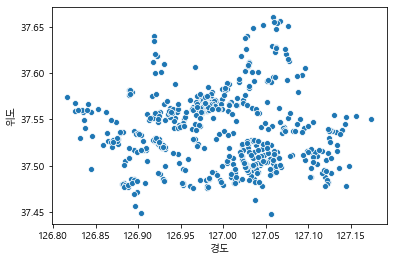

In [93]:
sns.scatterplot(data=df,x='경도',y='위도')

In [104]:
map = folium.Map(location=[df['위도'].mean(),df['경도'].mean()],zoom_start=11)

In [105]:
for n in df.index:
    add = df.loc[n,'주소']
    location = [df.loc[n,'위도'],df.loc[n,'경도']]
    folium.Marker(
        location=location,
        popup=add
    ).add_to(map)

In [106]:
map